In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\sisir.sahu\Self Learning2\Machine Learning\Kaggle Practice\5. SVR\HeightVsWeight.csv')


In [4]:
#split data into x and y
x = data.loc[:, 'Age'].values
y = data.loc[:, 'Height'].values

In [5]:
#train test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [6]:
#scale the train dataset
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train.reshape(-1, 1))
x_test = sc_x.transform(x_test.reshape(-1, 1))
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1, 1))

In [20]:
#import svr 
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf')
reg.fit(x_train, y_train.ravel()) # ravel() is used to convert height from a column vector to a 1D array

SVR()

In [21]:
y_pred = reg.predict(x_test)

In [22]:
sc_x.inverse_transform(x_test)

array([[32.],
       [10.],
       [59.],
       [14.],
       [65.],
       [28.],
       [20.],
       [43.],
       [56.],
       [22.],
       [41.],
       [19.],
       [71.],
       [15.],
       [63.]])

In [30]:
sc_y.inverse_transform(reg.predict(x_test).reshape(-1, 1))

array([[146.71],
       [140.76],
       [167.37],
       [139.86],
       [177.98],
       [144.44],
       [140.79],
       [153.81],
       [163.69],
       [141.53],
       [152.47],
       [140.49],
       [191.54],
       [139.85],
       [173.97]])

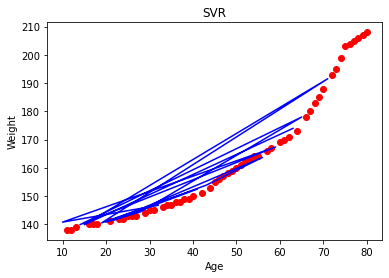

In [24]:
plt.scatter(sc_x.inverse_transform(x_train), sc_y.inverse_transform(y_train), color = 'red')
plt.plot(sc_x.inverse_transform(x_test),sc_y.inverse_transform(reg.predict(x_test).reshape(-1, 1)) , color = 'blue')
plt.title('SVR')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

In [25]:
np.set_printoptions(precision = 2) # for printing only upto 2 decimal places
y_pred = sc_y.inverse_transform(reg.predict(x_test).reshape(-1,1))
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred.reshape(len(y_pred), 1)), 1))

[[146.   146.71]
 [138.   140.76]
 [168.   167.37]
 [139.   139.86]
 [175.   177.98]
 [144.   144.44]
 [141.   140.79]
 [152.   153.81]
 [165.   163.69]
 [142.   141.53]
 [150.   152.47]
 [141.   140.49]
 [190.   191.54]
 [139.   139.85]
 [172.   173.97]]


In [26]:
z = 16
z = np.array(z).reshape(-1, 1)

In [16]:
sc_y.inverse_transform(reg.predict(z).reshape(-1,1))

array([[165.99]])

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9901261742130403

In [28]:
y_test, y_pred

(array([146, 138, 168, 139, 175, 144, 141, 152, 165, 142, 150, 141, 190,
        139, 172], dtype=int64),
 array([[146.71],
        [140.76],
        [167.37],
        [139.86],
        [177.98],
        [144.44],
        [140.79],
        [153.81],
        [163.69],
        [141.53],
        [152.47],
        [140.49],
        [191.54],
        [139.85],
        [173.97]]))